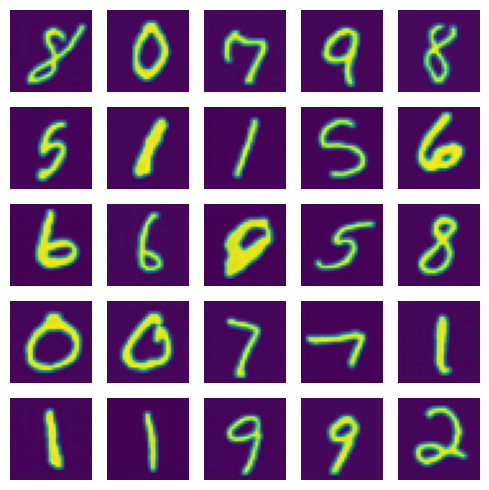

In [3]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


config = load_config()
x = np.load(config.samples_path)["x"]
plt.figure(figsize=(5, 5))
for i, j in product(range(5), range(5)):
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(x[i * 5 + j].reshape(32, 32))
    plt.axis("off")

plt.tight_layout()
plt.show()

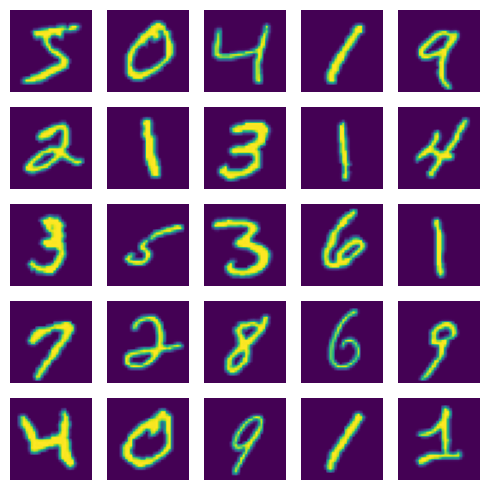

In [4]:
from config import load_config
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from utils import get_data_tensor


config = load_config()
x = get_data_tensor(config)
plt.figure(figsize=(5, 5))
for i, j in product(range(5), range(5)):
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(x[i * 5 + j].reshape(32, 32))
    plt.axis("off")

plt.tight_layout()
plt.show()